In [1]:
#to find the change in mean T_k against all redshifts for each model 

import os
import numpy as np
import scipy.interpolate as scI
import matplotlib.pyplot as plt
import glob

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k


def redS_meanTk(model,solar_mass):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*{model}*tk.cbin")
    files = sorted(glob.glob(pattern))

    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))

    return redshifts,mean_tk


def z_Spline(redshifts,mean_tk):
    
    #interpolation for a smooth plot
    ar_z=np.array(redshifts)
    ar_Mtk=np.array(mean_tk)

    #removing duplicate occurrences
    _,unique_idx=np.unique(ar_z,return_index=True)
    ar_z=ar_z[unique_idx]
    ar_Mtk=ar_Mtk[unique_idx]

    # check if we have enough points
    n_points = len(ar_z)

    if n_points < 2:
        raise ValueError("Not enough unique data points to interpolate.")
    elif n_points == 2:
        k = 1  # Linear interpolation
    elif n_points == 3:
        k = 2  # Quadratic spline
    else:
        k = 3  # Cubic spline

    #evenly spaced points for smooth curve
    z=np.linspace(min(ar_z),max(ar_z),300)

    #smooth spline
    spline=scI.make_interp_spline(ar_z,ar_Mtk,k=k)

    return z,spline

In [2]:
#MODEL fx=0.1, solar-mass=10^9  
d_path=r'G:\CD_data_project'
model="fx0.100E+00"
solar_mass="Mmin0.100E+10"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [3]:
print("the value of Tk at z=10.11 is approximately=", spline(10.11))

the value of Tk at z=10.11 is approximately= 983.56396484375


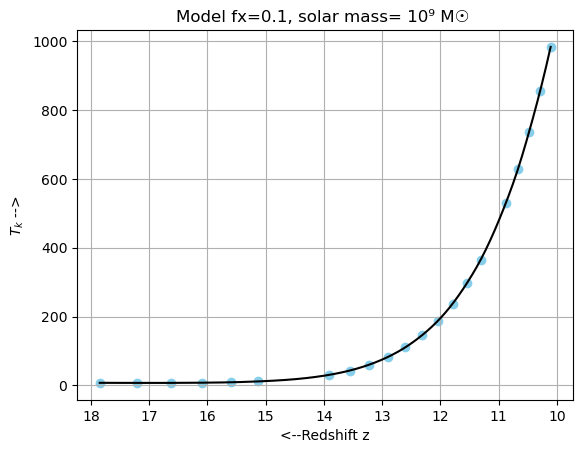

In [4]:
#smooth plot of t_k vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=0.1, solar mass= 10\u2079 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

In [6]:
#MODEL fx=0.1, solar-mass=10^10  
d_path=r'G:\CD_data_project'
model="fx0.100E+04"
solar_mass="Mmin0.100E+11"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [7]:
print("the value of z=10.11 is approximately=", spline(10.11))

the value of z=10.11 is approximately= 4536.48974609375


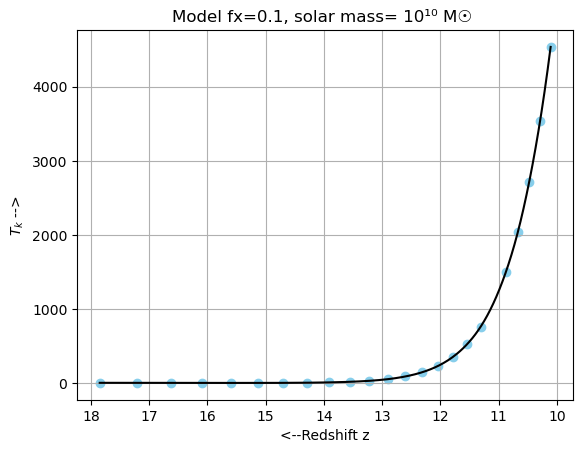

In [8]:
#smooth plot of x_a vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=0.1, solar mass= 10\u00B9\u2070 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

In [9]:
#MODEL fx=46.4, solar-mass=10^9  
d_path=r'G:\CD_data_project'
model="fx0.464E+02"
solar_mass="Mmin0.100E+10"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [10]:
print("the value of z=10.11 is approximately=", spline(10.11))

the value of z=10.11 is approximately= 2212.558837890625


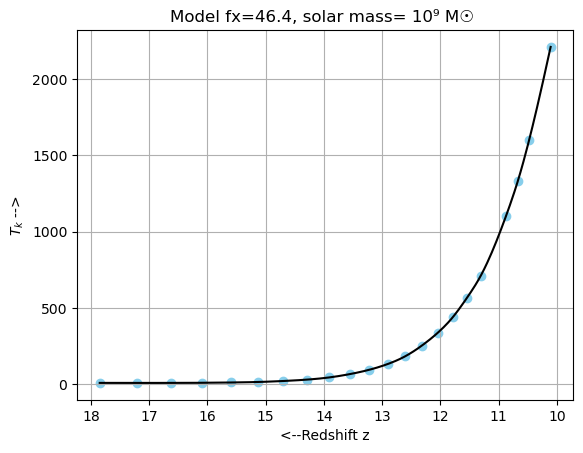

In [11]:
#smooth plot of x_a vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=46.4, solar mass= 10\u2079 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

In [12]:
#MODEL fx=46.4, solar-mass=10^10  
d_path=r'G:\CD_data_project'
model="fx0.464E+02"
solar_mass="Mmin0.100E+11"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [13]:
print("the value of z=10.11 is approximately=", spline(10.11))

the value of z=10.11 is approximately= 599.2850952148438


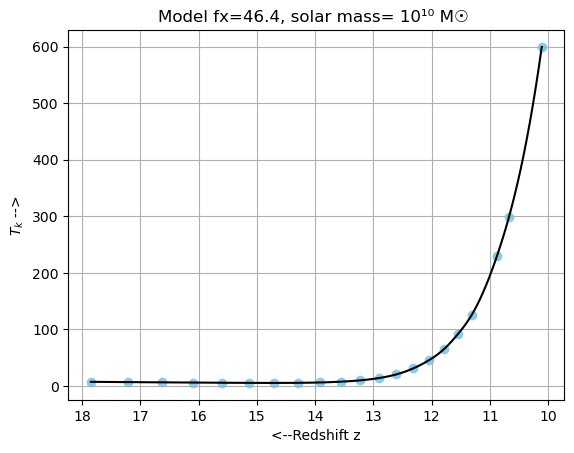

In [14]:
#smooth plot of x_a vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=46.4, solar mass= 10\u00B9\u2070 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

In [15]:
#MODEL fx=1000, solar-mass=10^9  
d_path=r'G:\CD_data_project'
model="fx0.100E+04"
solar_mass="Mmin0.100E+10"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [16]:
print("the value of z=10.11 is approximately=", spline(10.11))

the value of z=10.11 is approximately= 14263.9658203125


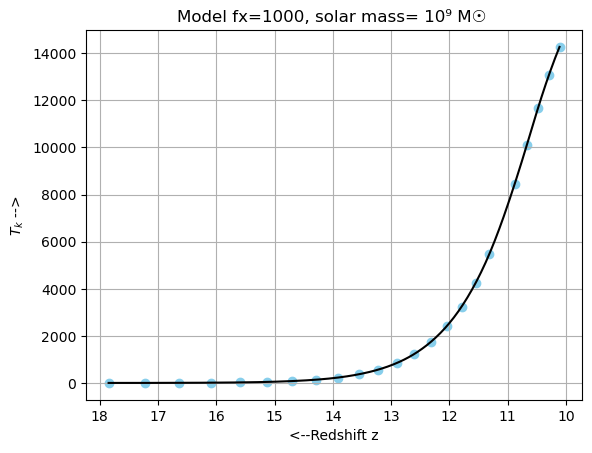

In [17]:
#smooth plot of x_a vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=1000, solar mass= 10\u2079 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

In [18]:
#MODEL fx=1000, solar-mass=10^10  
d_path=r'G:\CD_data_project'
model="fx0.100E+04"
solar_mass="Mmin0.100E+11"
redshifts,mean_tk=redS_meanTk(model,solar_mass)
z,spline=z_Spline(redshifts,mean_tk)

In [19]:
print("the value of z=10.11 is approximately=", spline(10.11))

the value of z=10.11 is approximately= 4536.48974609375


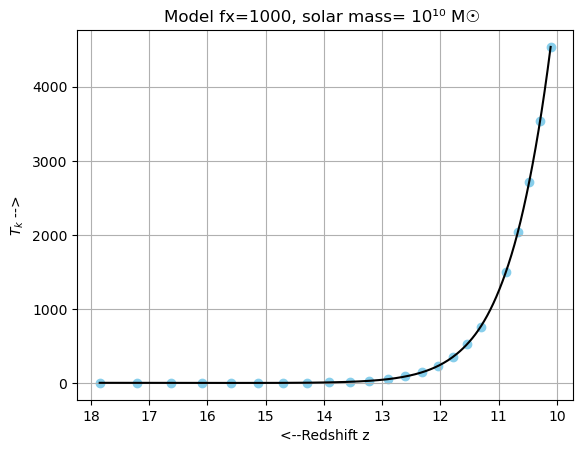

In [20]:
#smooth plot of x_a vs z
plt.plot(z,spline(z), label='smooth curve',color='black')
plt.scatter(redshifts,mean_tk, color='skyblue',label='original points')
plt.title("Model fx=1000, solar mass= 10\u00B9\u2070 M\u2609 ")
plt.xlabel("<--Redshift z")
plt.gca().invert_xaxis()
plt.ylabel("$T_k$ -->")
plt.grid(True)
plt.show()

Model: fx0.100E+00, Points read: 23
Model: fx0.464E+02, Points read: 23
Model: fx0.100E+04, Points read: 23


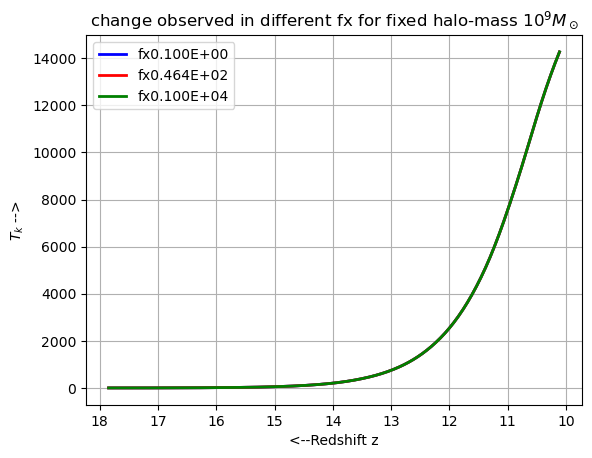

the total runtime is: 1347.0812230110168 s


In [27]:
#Change in mean Tk vs z for varying fx at a fixed halo mass

import os
import numpy as np
import scipy.interpolate as scI
import matplotlib.pyplot as plt
import glob
import time

start= time.time()
def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k


def redS_meanTk(model,solar_mass):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{model}_*tk.cbin")
    files = sorted(glob.glob(pattern))

    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))

    return redshifts,mean_tk


def z_Spline(redshifts,mean_tk):
    
    #interpolation for a smooth plot
    ar_z=np.array(redshifts)
    ar_Mtk=np.array(mean_tk)

    #removing duplicate occurrences
    _,unique_idx=np.unique(ar_z,return_index=True)
    ar_z=ar_z[unique_idx]
    ar_Mtk=ar_Mtk[unique_idx]

    # check if we have enough points
    n_points = len(ar_z)

    if n_points < 2:
        raise ValueError("Not enough unique data points to interpolate.")
    elif n_points == 2:
        k = 1  # Linear interpolation
    elif n_points == 3:
        k = 2  # Quadratic spline
    else:
        k = 3  # Cubic spline

    #evenly spaced points for smooth curve
    z=np.linspace(min(ar_z),max(ar_z),300)

    #smooth spline
    spline=scI.make_interp_spline(ar_z,ar_Mtk,k=k)

    return z,spline

d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
for i,fx in enumerate(models):
    redshifts,mean_tk=redS_meanTk(model,solar_mass)
    print(f"Model: {fx}, Points read: {len(redshifts)}") #print the model names read and corresponding count oof redshifts
    z,spline=z_Spline(redshifts,mean_tk)
    plt.plot(z,spline(z), label=f"{fx}", color=c[i], linewidth=2) #distinguish the curves 

plt.title("change observed in different fx for fixed halo-mass $10^{9} M_\\odot$")
plt.xlabel("<--Redshift z")
plt.ylabel("$T_k$ -->")
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.show()

end=time.time()
print("the total runtime is:",end-start,"s")

C:\Users\HP\AppData\Local\Temp\ipykernel_11232\1906840605.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


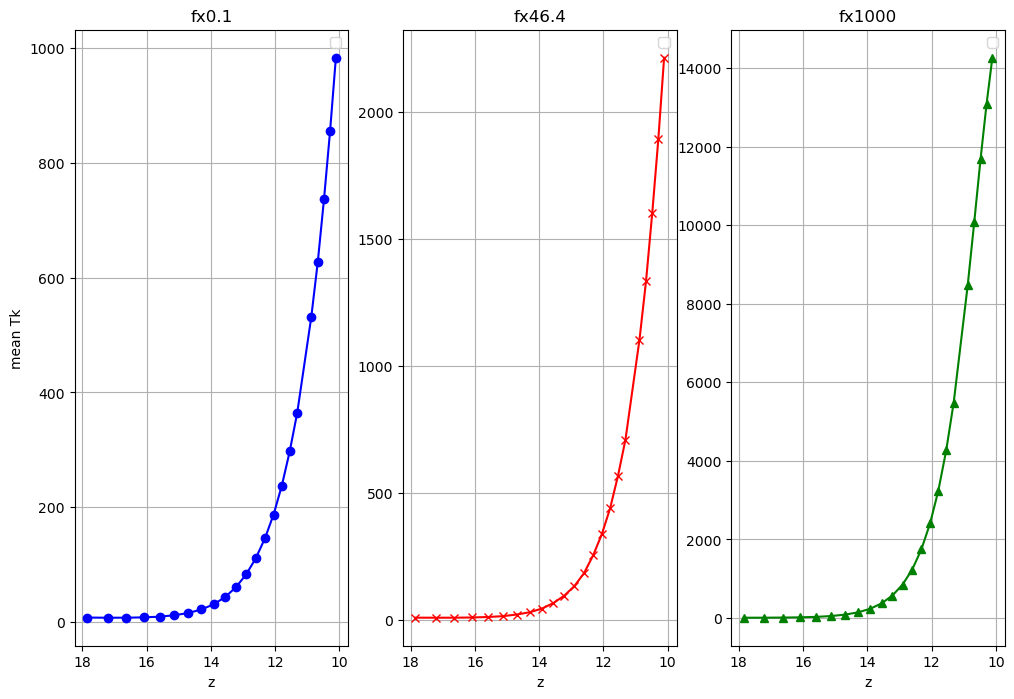

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,axes=plt.subplots(1,3,figsize=(12,8))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))

    ax=axes[i]
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
    ax.set_title(t[i])
    ax.set_xlabel("z")
    
    if i==0:
        ax.set_ylabel("mean Tk")    
    #ax.set_ylim(0,200)                
    ax.invert_xaxis()
    ax.grid(True)
    ax.legend()
plt.show()
   

C:\Users\HP\AppData\Local\Temp\ipykernel_7280\1891662981.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


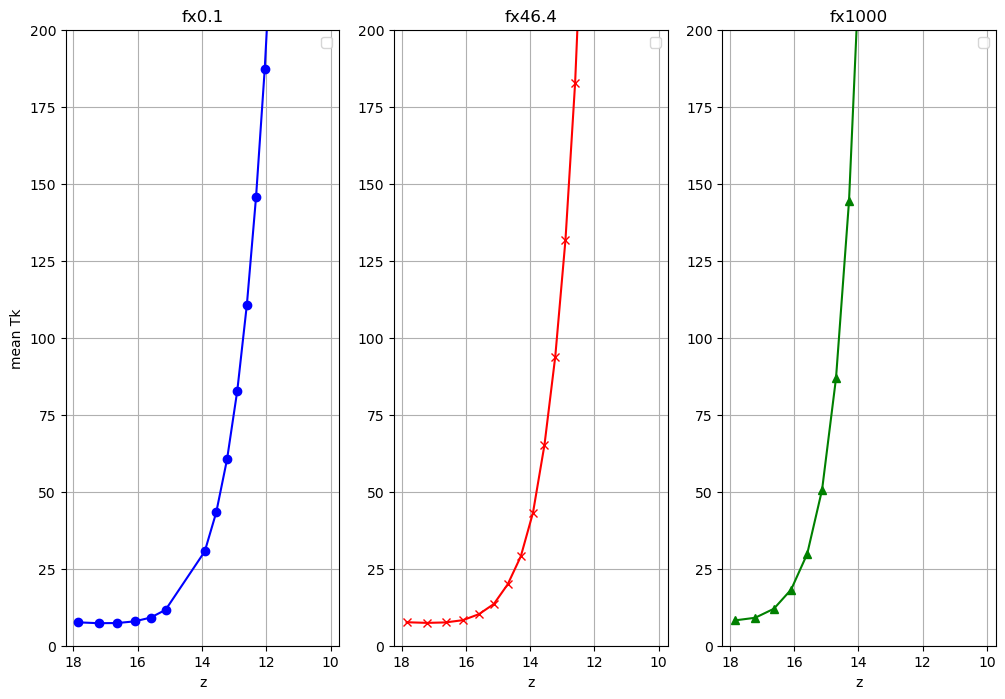

'\n        ar_z=np.array(redshifts)\n        ar_Mtk=np.array(mean_tk)\n\n        #removing duplicate occurrences\n        _,unique_idx=np.unique(ar_z,return_index=True)\n        ar_z=ar_z[unique_idx]\n        ar_Mtk=ar_Mtk[unique_idx]\n\n        # check if we have enough points\n        n_points = len(ar_z)\n\n        if n_points < 2:\n            raise ValueError("Not enough unique data points to interpolate.")\n        elif n_points == 2:\n            k = 1  # Linear interpolation\n        elif n_points == 3:\n            k = 2  # Quadratic spline\n        else:\n            k = 3  # Cubic spline\n\n        #evenly spaced points for smooth curve\n        z=np.linspace(min(ar_z),max(ar_z),300)\n\n        #smooth spline\n        spline=scI.make_interp_spline(ar_z,ar_Mtk,k=k)\n'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,axes=plt.subplots(1,3,figsize=(12,8))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))

    ax=axes[i]
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
    ax.set_title(t[i])
    ax.set_xlabel("z")
    
    if i==0:
        ax.set_ylabel("mean Tk")    
    ax.set_ylim(0,200)                
    ax.invert_xaxis()
    ax.grid(True)
    ax.legend()
plt.show()
   

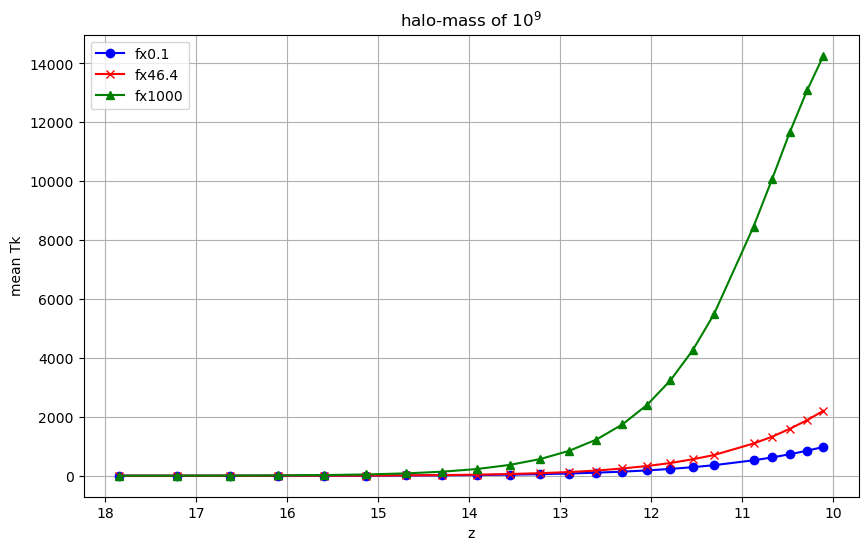

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,ax=plt.subplots(figsize=(10,6))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("halo-mass of $10^{9}$")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
#ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

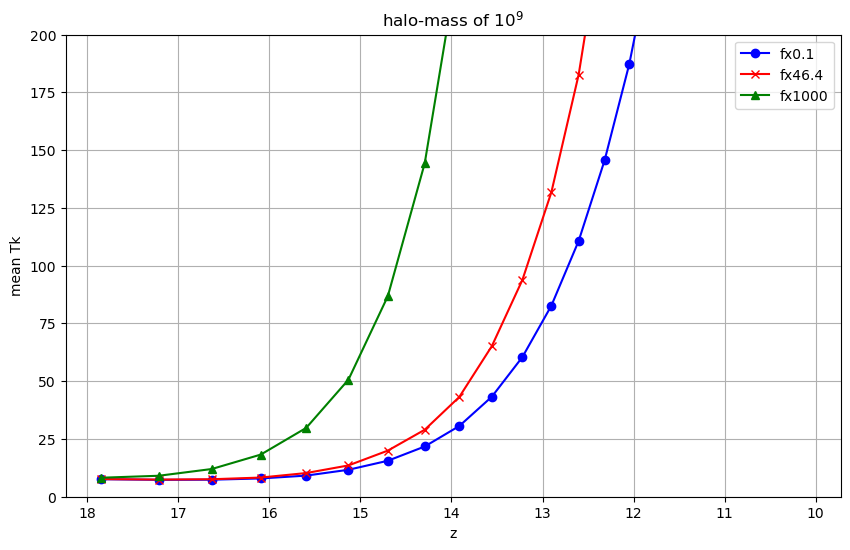

In [5]:
#ZOOM TO Tk upto 200
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,ax=plt.subplots(figsize=(10,6))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("halo-mass of $10^{9}$")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

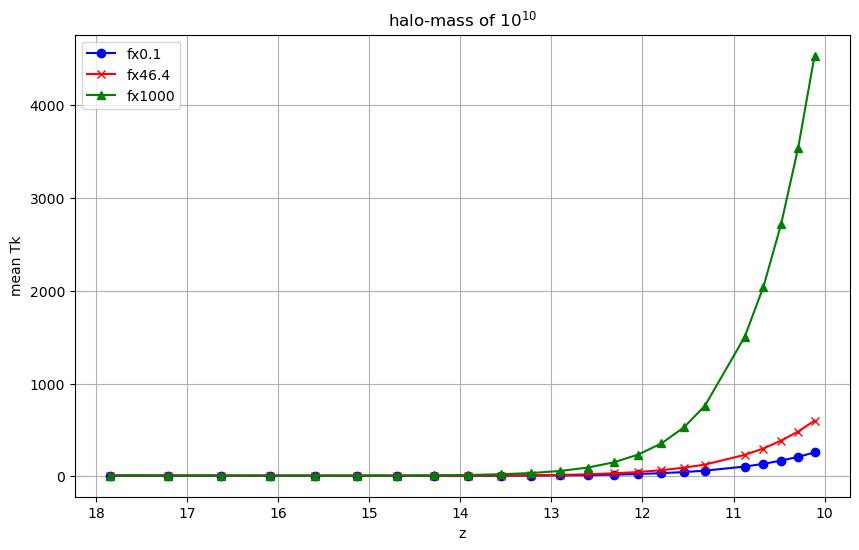

In [3]:
#fixed Halo mass 10^10
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k
    
d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+11"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,ax=plt.subplots(figsize=(10,6))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("halo-mass of $10^{10}$")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
#ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

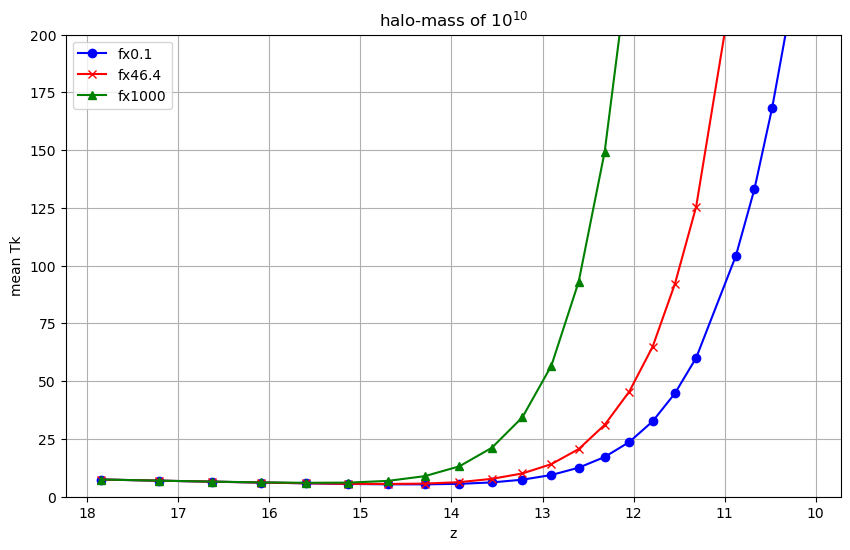

In [7]:
#fixed Halo mass 10^10
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k
    
d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+11"
c=['blue','red','green']
t=["fx0.1","fx46.4","fx1000"]
markers=['o','x','^']

fig,ax=plt.subplots(figsize=(10,6))

for i,fx in enumerate(models):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*_{fx}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("halo-mass of $10^{10}$")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\1416918406.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


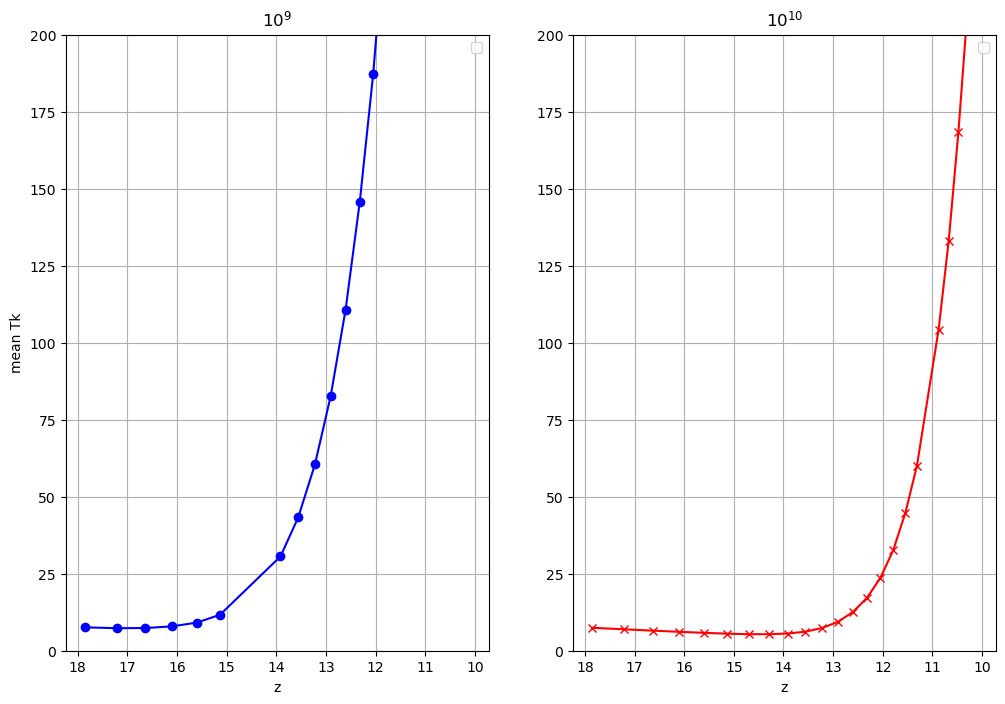

In [13]:
##fixed model fx=0.1, Varying halo-mass

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models="fx0.100E+00"
solar_mass=["Mmin0.100E+10","Mmin0.100E+11"]
c=['blue','red']
t=["$10^9$","$10^{10}$"]
markers=['o','x']

fig,axes=plt.subplots(1,2,figsize=(12,8))

for i,mass in enumerate(solar_mass):
    
    pattern = os.path.join(d_path, f"*{mass}*_{models}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))

    ax=axes[i]
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
    ax.set_title(f"{t[i]}: $M_{\odot}$")
    ax.set_xlabel("z")    
    if i==0:
        ax.set_ylabel("mean Tk")    
    ax.set_ylim(0,200)                
    ax.invert_xaxis()
    ax.grid(True)
    ax.legend()
plt.show()

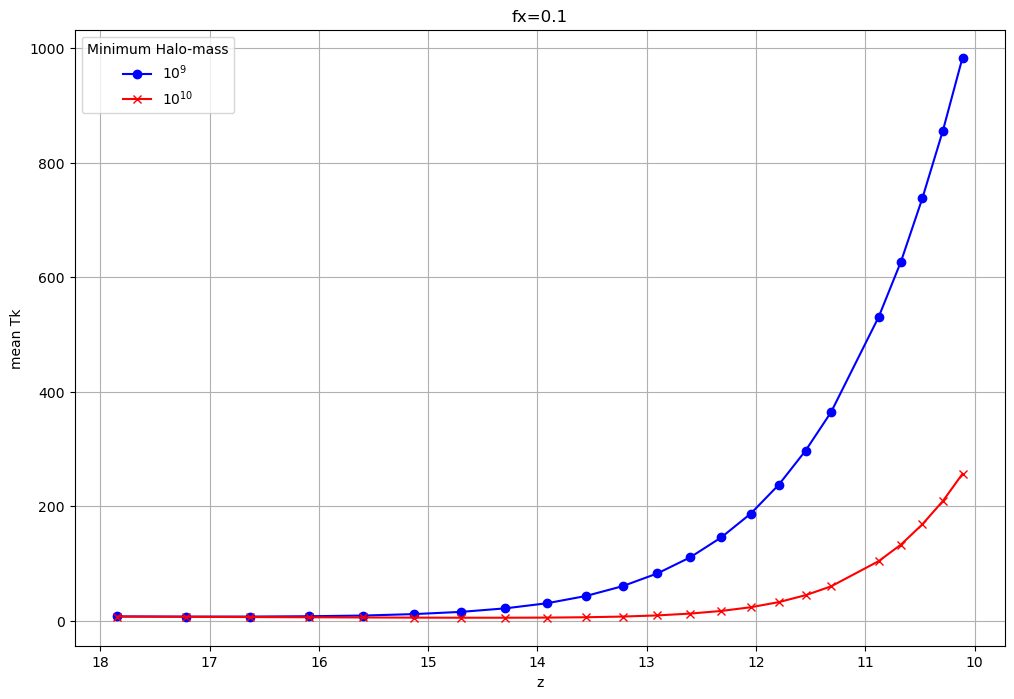

In [17]:
#curves in a single plot

##fixed model fx=0.1, Varying halo-mass

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.interpolate as scI 

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    T_k=np.fromfile(f,dtype='float32')
    return T_k

d_path=r'G:\CD_data_project'
models="fx0.100E+00"
solar_mass=["Mmin0.100E+10","Mmin0.100E+11"]
c=['blue','red']
t=["$10^9$","$10^{10}$"]
markers=['o','x']

fig,ax=plt.subplots(figsize=(12,8))

for i,mass in enumerate(solar_mass):
    
    pattern = os.path.join(d_path, f"*{mass}*_{models}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("fx=0.1")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
#ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend(title='Minimum Halo-mass')
plt.show()

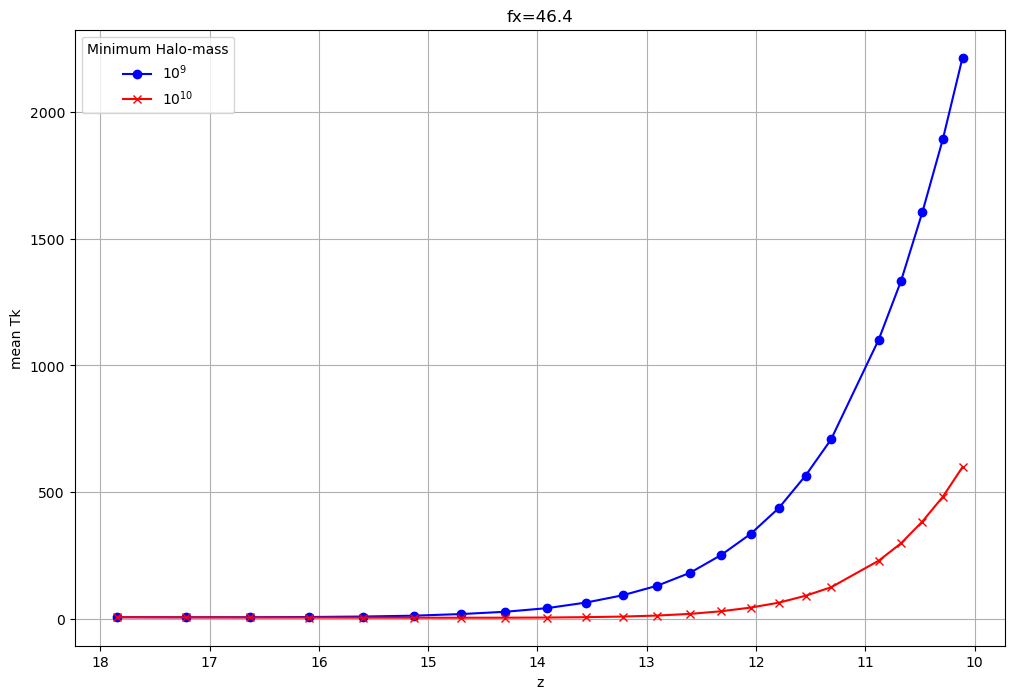

In [18]:
##fixed model fx=46.4, varying halo-mass

d_path=r'G:\CD_data_project'
models="fx0.464E+02"
solar_mass=["Mmin0.100E+10","Mmin0.100E+11"]
c=['blue','red']
t=["$10^9$","$10^{10}$"]
markers=['o','x']

fig,ax=plt.subplots(figsize=(12,8))

for i,mass in enumerate(solar_mass):
    
    pattern = os.path.join(d_path, f"*{mass}*_{models}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("fx=46.4")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
#ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend(title='Minimum Halo-mass')
plt.show()

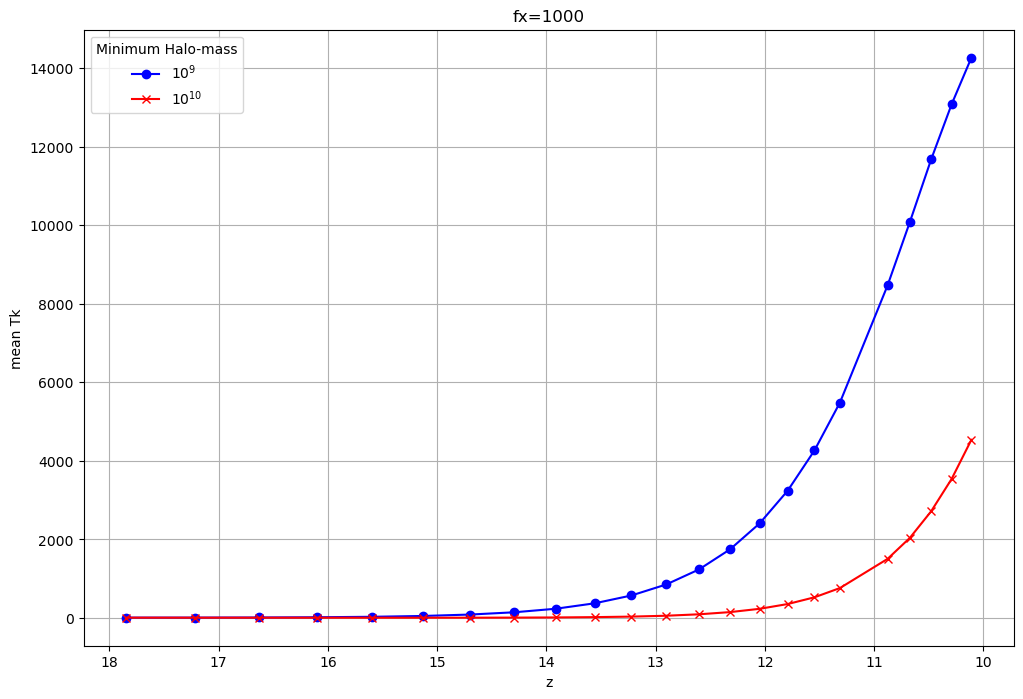

In [19]:
##fixed model fx=1000, varying halo-mass

d_path=r'G:\CD_data_project'
models="fx0.100E+04"
solar_mass=["Mmin0.100E+10","Mmin0.100E+11"]
c=['blue','red']
t=["$10^9$","$10^{10}$"]
markers=['o','x']

fig,ax=plt.subplots(figsize=(12,8))

for i,mass in enumerate(solar_mass):
    
    pattern = os.path.join(d_path, f"*{mass}*_{models}_*tk.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    mean_tk=[]

    for f in files:
        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_tk.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    ax.plot(redshifts,mean_tk, marker=markers[i],linestyle='-',color=c[i],label=t[i])
    #ax.scatter(ar_z,ar_Mtk,color='skyblue',s=10)
ax.set_title("fx=1000")
ax.set_xlabel("z")    
ax.set_ylabel("mean Tk")    
#ax.set_ylim(0,200)                
ax.invert_xaxis()
ax.grid(True)
ax.legend(title='Minimum Halo-mass')
plt.show()

In [ ]:
#image analysis for each fx 

[600 600 600]


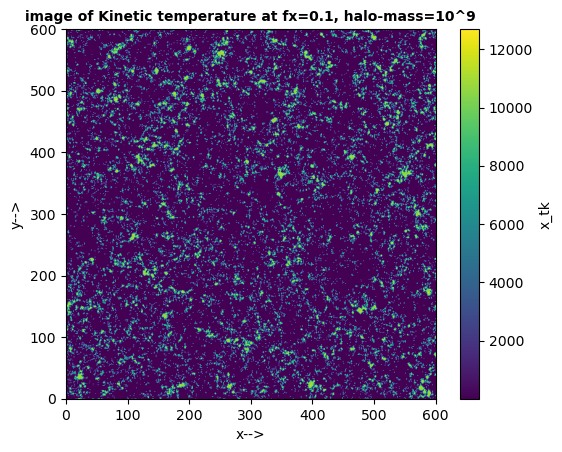

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file='10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+00_sed3_al1.200tk.cbin'
file_tk=open(file,'rb')#open
n=np.fromfile(file_tk,count=3,dtype='int32')#removing header info
print(n)   
field_tk=np.fromfile(file_tk,dtype='float32')#read

field_tk=field_tk.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(field_tk[0],)#first plane along z direction
ax.set_title("image of Kinetic temperature at fx=0.1, halo-mass=10^9",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='x_tk',orientation="vertical")
plt.show()

In [ ]:
#mean_tk at fx=0.1,halo-mass=10^9
print(np.mean(field_tk))

983.56396


[600 600 600]


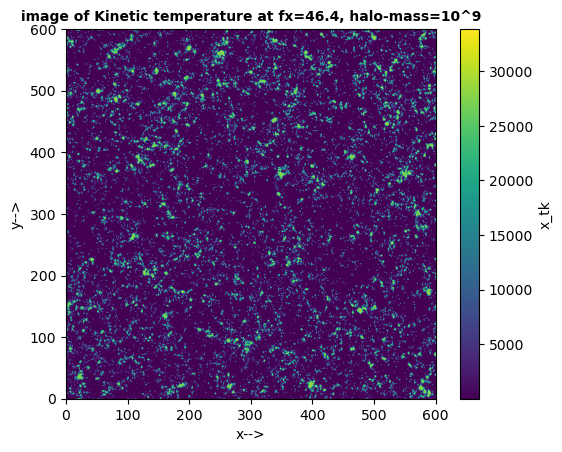

In [ ]:
file='10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.464E+02_sed3_al1.200tk.cbin'
file_tk=open(file,'rb')#open
n=np.fromfile(file_tk,count=3,dtype='int32')#removing header info
print(n)   
field_tk=np.fromfile(file_tk,dtype='float32')#read

field_tk=field_tk.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(field_tk[0],)#first plane along z direction
ax.set_title("image of Kinetic temperature at fx=46.4, halo-mass=10^9",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='x_tk',orientation="vertical")
plt.show()

In [ ]:
#mean_tk at fx=46.4,halo-mass=10^9
print(np.mean(field_tk))

2212.5588


[600 600 600]


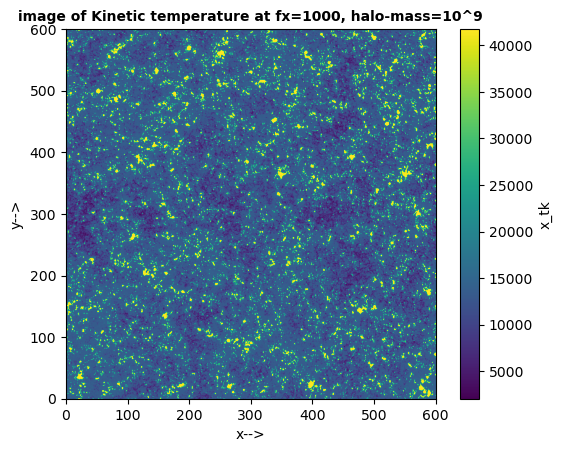

In [ ]:
file='10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+04_sed3_al1.200tk.cbin'
file_tk=open(file,'rb')#open
n=np.fromfile(file_tk,count=3,dtype='int32')#removing header info
print(n)   
field_tk=np.fromfile(file_tk,dtype='float32')#read
field_tk

field_tk=field_tk.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(field_tk[0],)#first plane along z direction
ax.set_title("image of Kinetic temperature at fx=1000, halo-mass=10^9",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='x_tk',orientation="vertical")
plt.show()

In [ ]:
#mean_tk at fx=1000,halo-mass=10^9
print(np.mean(field_tk))

14263.966
